# Assignment 2 (90 marks)

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [3]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 16.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [2]:
WDI_data = pd.read_csv("./files/WDI_csv/WDIData.csv")
print(WDI_data.columns)
print(WDI_data.info())
WDI_data.head()

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377256 entries, 0 to 377255
Data columns (total 65 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    377256 non-null  object 
 1   Country Code    377256 non-null  object 
 2   Indicator Name  377256 non-null  object 
 3   Indicator Co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [3]:
WDI_ids = pd.read_csv("./files/WDI_csv/WDISeries.csv")
print(WDI_ids.columns)
WDI_ids.head()

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1 (4 marks):</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**

1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

- "Emissions"
    - environmental indicators can help us assess and analyze data related to the emission of pollutants, including particle matter, across different regions. This analysis can provide insights into the sources of pollution and their impact on the environment.
- "Mortality"
    - indicators allow us to analyze time series data related to health issues, 
    particularly those possibly lined to an increase in air pollution, This can help 
    use tract trends in mortality rates and health outcomes affected by the environmental
    factor like particle matter exposure. 

In [4]:
WDI_ids[WDI_ids["Topic"].str.contains("Environment")].head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


In [5]:
WDI_ids["Subtopic"] = WDI_ids["Topic"].str.split(": ", expand=True)[1]
WDI_ids["Subtopic"].unique()

array(['Agricultural production', 'Land use', 'Balance of payments',
       'Communications', 'Capital markets',
       'Official development assistance', 'External debt', None,
       'Energy production & use', 'Emissions',
       'Biodiversity & protected areas', 'Density & urbanization',
       'Transportation', 'Freshwater', 'Assets', 'Access',
       'Monetary holdings (liabilities)', 'Exchange rates & prices',
       'Interest rates', 'Technology', 'Government finance',
       'Policy & institutions', 'Business environment',
       'Trade facilitation', 'Private infrastructure investment',
       'Defense & arms trade', 'National accounts',
       'Purchasing power parity', 'Natural resources contribution to GDP',
       'Performance', 'Outcomes', 'Participation', 'Inputs', 'Efficiency',
       'Public life & decision making', 'Participation & access',
       'Health', 'Risk factors', 'Nutrition', 'Disease prevention',
       'Mortality', 'Reproductive health', 'Health systems',


-------

<h3>Exercise 2 (4 marks):</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**

In [6]:
"Total # Ids %d" % WDI_ids.shape[0]

'Total # Ids 1429'

In [7]:
Emissions_ar = WDI_ids[WDI_ids['Subtopic'].isin(["Emissions"])]["Series Code"].unique()
Emissions_df = WDI_data[WDI_data['Indicator Code'].isin(Emissions_ar)]

print("There a total number of unique emissions indicators %s" % (len(Emissions_df["Indicator Code"].unique())))
print("There a total number of emissions indicators %s" % (len(Emissions_df["Indicator Code"])))

There a total number of unique emissions indicators 42
There a total number of emissions indicators 11088


In [8]:
Emissions_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
64,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.757162,0.770413,0.737665,0.769023,NaN,NaN,NaN,NaN,NaN,NaN


-------

<h3>Exercise 3 (4 marks):</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

In [9]:
# Parameters:
#   Emissions_df: DataFrame to be reshaped.
#   id_vars: List of columns that will remain unchanged during the melting process.
#            These columns act as identifiers for each row.
#   var_name: Name to assign to the column containing the variable names (e.g., years).
#   value_name: Name to assign to the column containing the associated values.
Emissions_df = Emissions_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                 var_name='Year', 
                                 value_name="Indicator Value")

In [10]:
# Display top 5 rows of the Dataframe table
Emissions_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN


In [11]:
# Display bottom 5 rows of the Dataframe table
Emissions_df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
676363,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,Unnamed: 64,NaN
676364,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,Unnamed: 64,NaN
676365,Zimbabwe,ZWE,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,Unnamed: 64,NaN
676366,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,Unnamed: 64,NaN
676367,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Unnamed: 64,NaN


-------

<h3>Exercise 4 (4 marks):</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

**Answer.**


Certainly, here's a revised version of your points:

1. Identifying Countries with Missing Indicator Values:
    - Determine which countries have missing values (NaN) in their indicator values.
2. Dealing with Missing Data:
    -   When handling this data, there are two main approaches to consider:
        - Option 1: Dropping Rows with Missing Values:
            - Pros:
                - Reduces the volume of data to manage.
                - Avoids making assumptions that could lead to incorrect conclusions.
            - Cons:
                - Assuming that interpolating data may result in inaccurate conclusions.
                - The loss of significant information may hinder the ability to draw valid conclusions.
        - Option 2: Using model to determine and interpolate data 
            -  Instead of dropping rows with missing values, consider employing a data interpolation model to estimate and fill in the missing data points.
            - Pros:
                - Retains more data, reducing data loss.
                - May provide a more accurate representation of missing values.
            - Cons:
                - The accuracy of the model's predictions must be carefully assessed.
                - Implementing the model may introduce complexities and require additional computational resources.

In [12]:
nan_emission = Emissions_df[Emissions_df["Indicator Value"].isnull()]
country_with_nan = nan_emission["Country Code"].unique()
total = len(Emissions_df["Country Code"].unique())
print(f"total of {int(len(country_with_nan) / total) * 100}% countries contain NaN Indicator Values")
print(f"Total of {(len(Emissions_df[Emissions_df['Indicator Value'].isnull()])/len(Emissions_df)) * 100:.2f}% the Indicator Values of Emission is NaN")

total of 100% countries contain NaN Indicator Values
Total of 51.82% the Indicator Values of Emission is NaN


In general, if you have access to a reliable interpolation model and are willing to invest the computational resources and effort in using it, Option 2 may be preferred. However, if the missing data is extensive, and you're concerned about potential inaccuracies introduced by interpolation, or if you have limited resources, Option 1 might be the more practical choice.

given the missing data is grater then 50%> then it would be a more practical outcome to just drop the Nan from the our Dataframe. This is decision is determine on the basis of Maintaining Data Integrity, Simplicity & Efficiency, as well as Avoiding Assumption.

In [13]:
print("percentage of Unameed:64 in Years: %0.5s " % (100 * len(Emissions_df[Emissions_df["Year"] == "Unnamed: 64"]) / len(Emissions_df)))

percentage of Unameed:64 in Years: 1.639 


In [14]:
# Given we wont be losing to much information then opt to removing it 
Emissions_df.drop(Emissions_df[Emissions_df["Year"] == "Unnamed: 64"].index, inplace=True)
assert len(Emissions_df[Emissions_df["Year"] == "Unnamed: 64"]) == 0, "Unnamed: 64 Was not removed..."
assert len(Emissions_df[Emissions_df["Year"] == np.NaN]) == 0, "There is not empty value"

In [15]:
Emissions_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN


In [16]:
Emissions_df[Emissions_df["Indicator Value"].isnull()]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN
...,...,...,...,...,...,...
665275,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,2019,NaN
665276,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,2019,NaN
665277,Zimbabwe,ZWE,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,2019,NaN
665278,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,2019,NaN


In [17]:
Emissions_df[(Emissions_df["Indicator Value"].notnull()) & (Emissions_df["Country Code"] == "ARB")]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59535.396567
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.645736
10,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292
12,Arab World,ARB,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1960,84.851473
13,Arab World,ARB,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1960,50539.802737
...,...,...,...,...,...,...
609875,Arab World,ARB,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,2015,100.000000
620962,Arab World,ARB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,58.764905
620963,Arab World,ARB,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,2016,100.000000
632050,Arab World,ARB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2017,58.689259


In [18]:
Emissions_df[(Emissions_df['Indicator Name'] == "CO2 emissions (kt)") & (Emissions_df["Country Code"] == "ARB" )]['Indicator Value'][-10:-6].describe()

count    4.000000e+00
mean     1.718356e+06
std      7.876112e+04
min      1.645559e+06
25%      1.653246e+06
50%      1.715452e+06
75%      1.780562e+06
max      1.796962e+06
Name: Indicator Value, dtype: float64

-------

<h3>Exercise 5 (4 marks):</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

**Answer.**

In [19]:
WDICountry = pd.read_csv('./files/WDI_csv/WDICountry.csv')
region_country_codes = WDICountry[WDICountry['Region'].isnull()]["Country Code"]
country_codes = WDICountry[WDICountry['Region'].notnull()]["Country Code"]

In [20]:
Emissions_C_df = Emissions_df[Emissions_df['Country Code'].isin(country_codes)]
Emissions_R_df = Emissions_df[Emissions_df['Country Code'].isin(region_country_codes)]

In [21]:
Emissions_C_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
1974,Afghanistan,AFG,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1975,Afghanistan,AFG,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
1976,Afghanistan,AFG,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
1977,Afghanistan,AFG,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
1978,Afghanistan,AFG,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN
...,...,...,...,...,...,...
665275,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,2019,NaN
665276,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,2019,NaN
665277,Zimbabwe,ZWE,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,2019,NaN
665278,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,2019,NaN


In [22]:
Emissions_R_df["Country Name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

-------

<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

<h3>Exercise 6 (5 marks) :</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

In [23]:
# list of shotten name
new_indicator_names = ["Total", "CO2", "CH4", "N2O", "Other", "PM2.5", "PM2.5_WHO"]

In [24]:
indicator_map = pd.DataFrame({"long" : [
 'Total greenhouse gas emissions (kt of CO2 equivalent)',
 'CO2 emissions (kt)',
 'Methane emissions (kt of CO2 equivalent)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)'],
 "short" : new_indicator_names
 })

In [25]:

# Country replace 
Emissions_C_df['Indicator Name'].replace(indicator_map.set_index('long')['short'], inplace=True)
filtered_Emissions_C_df = Emissions_C_df[Emissions_C_df['Indicator Name'].isin(new_indicator_names)]

# Region replace 
Emissions_R_df['Indicator Name'].replace(indicator_map.set_index('long')['short'], inplace=True)
filtered_Emissions_R_df = Emissions_R_df[Emissions_R_df['Indicator Name'].isin(new_indicator_names)]


# Within the Emissions Country, and Region the New Indicator names should only exist
assert sorted(filtered_Emissions_C_df["Indicator Name"].unique().tolist()) == sorted(new_indicator_names)
assert sorted(filtered_Emissions_R_df["Indicator Name"].unique().tolist()) == sorted(new_indicator_names)
# If no assertion is throw then there only exists indicator names "Total", "CO2", "CH4", "N2O", "Other", "PM2.5", and "PM2.5_WHO"

-------

<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7 (15 marks):</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1 (5 marks)</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

In [26]:
main_pollutants = ["CO2", "CH4", "N2O", "Other"]
filtered_df = filtered_Emissions_C_df[filtered_Emissions_C_df['Indicator Name'].isin(main_pollutants)]

grouped_df = filtered_df.groupby('Indicator Name')['Indicator Value'].describe()

print(f'{"":_>5}{"Basic Stats":^11}{"":_>98}')
grouped_df

_____Basic Stats__________________________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
Indicator Name,,,,,,,,
CH4,8736.0,31900.185639,104985.622926,0.000,880.621250,5457.5050,19325.339000,1.752290e+06
CO2,9856.0,100481.131586,495094.173851,-80.674,557.384000,4275.7220,40085.810500,1.029193e+07
N2O,8779.0,13575.872976,41248.850927,0.000,291.106585,2499.2944,8913.466837,5.871664e+05
Other,7971.0,30824.989016,132149.566564,-326272.600,7.548464,843.2500,10754.864020,3.484920e+06


In [27]:
CO2 = filtered_df[filtered_df["Indicator Name"] == 'CO2']
CH4 = filtered_df[filtered_df["Indicator Name"] == 'CH4']
N2O = filtered_df[filtered_df["Indicator Name"] == 'N2O']
Others = filtered_df[filtered_df["Indicator Name"] == 'Other']

<AxesSubplot: xlabel='Year', ylabel='Indicator Value'>

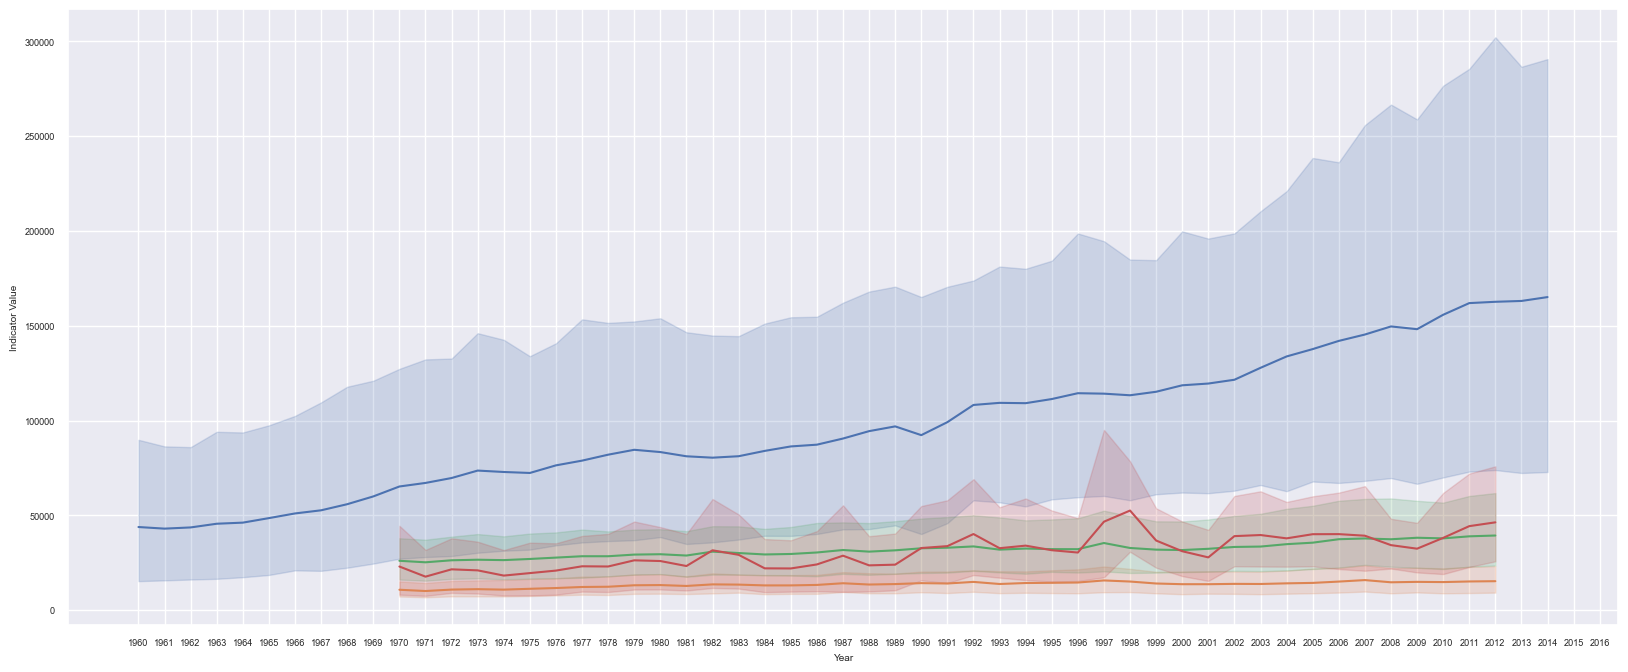

In [28]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=0.6)

# Plot CO2 data
plt.subplot(1, 1, 1)
sns.lineplot(CO2, x="Year", y="Indicator Value")
sns.lineplot(N2O, x="Year", y="Indicator Value")
sns.lineplot(CH4, x="Year", y="Indicator Value")
sns.lineplot(Others, x="Year", y="Indicator Value")
# plt.title(f'CO2 - {CO2.mean()["Indicator Value"]:.2f} kt (Mean)')

This might be a little difficult to read so lets look at them on the individual level.

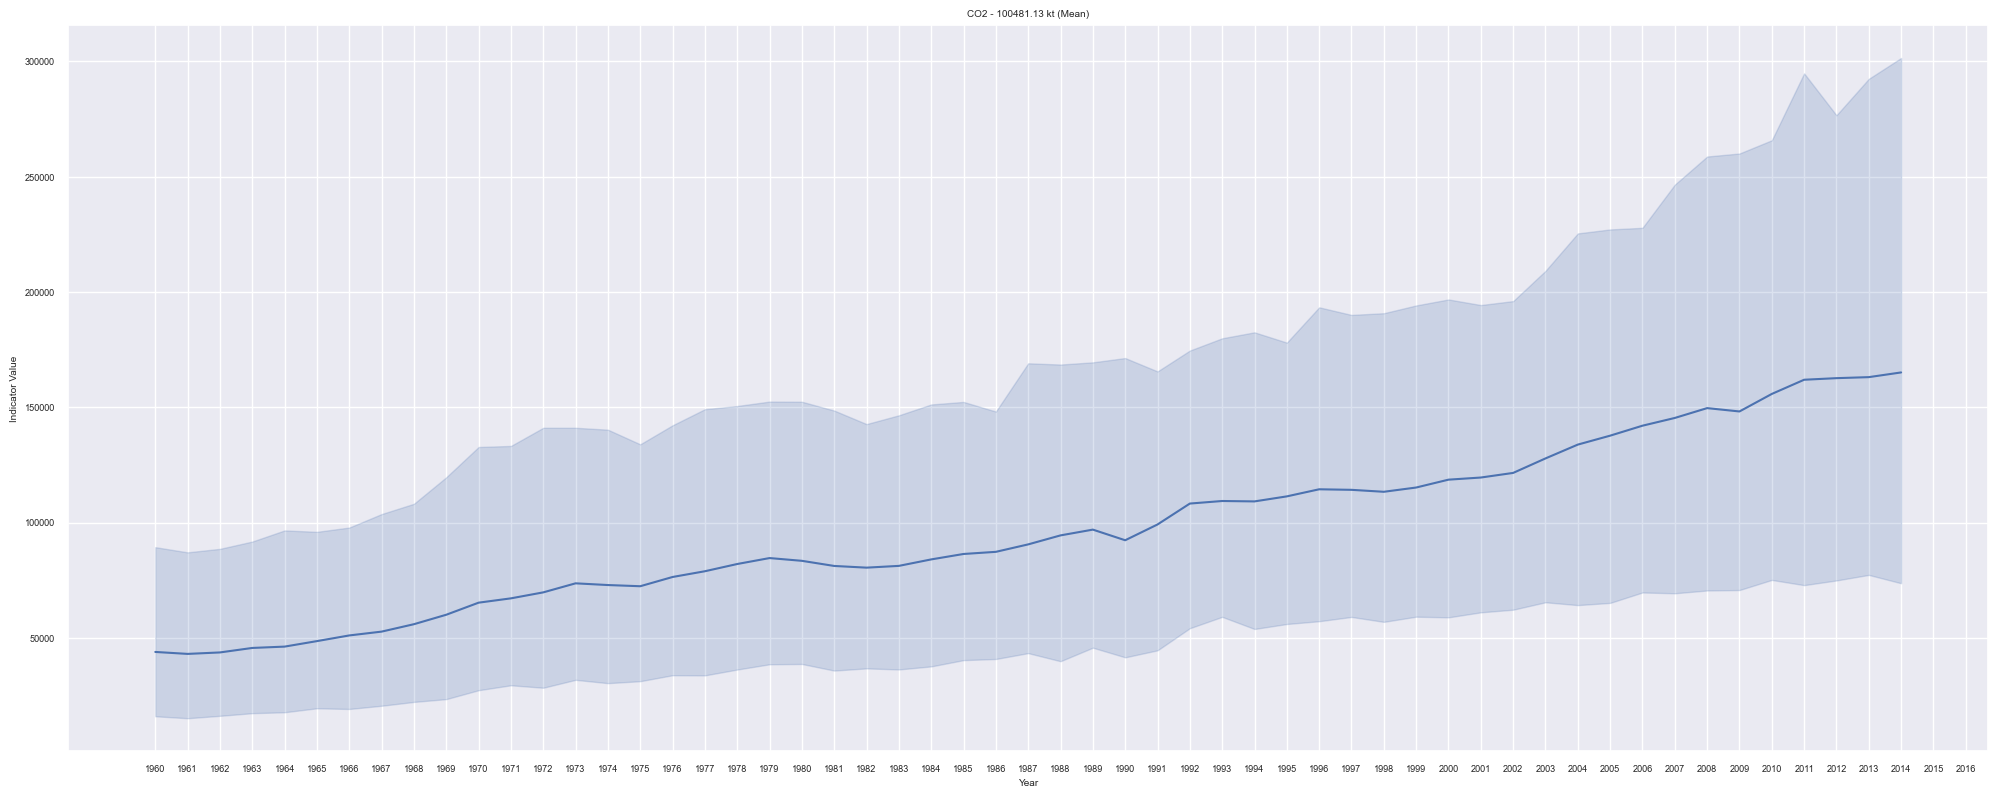

In [29]:
# Create a new figure for plotting with a specific figure size.
plt.figure(figsize=(20, 8))

# Set the font scale for the seaborn library to make text labels smaller for the plot.
sns.set(font_scale=0.6)

# Create a subplot within the figure. In this case, there's only one subplot.
plt.subplot(1, 1, 1)

# Plot CO2 data using a line plot.
# Parameters:
#   - CO2: The DataFrame containing the data to be plotted.
#   - x: The column in the DataFrame to be used as the x-axis data (Year).
#   - y: The column in the DataFrame to be used as the y-axis data (Indicator Value).
sns.lineplot(data=CO2, x="Year", y="Indicator Value")

# Set the title for the plot, including the mean value of the "Indicator Value" from the CO2 data.
plt.title(f'CO2 - {CO2["Indicator Value"].mean():.2f} kt (Mean)')

# Ensure tight layout to prevent overlapping elements in the plot.
plt.tight_layout()

# Display the plot.
plt.show()


Text(0.5, 1.0, 'CH4 - 31900.19 kt (Mean)')

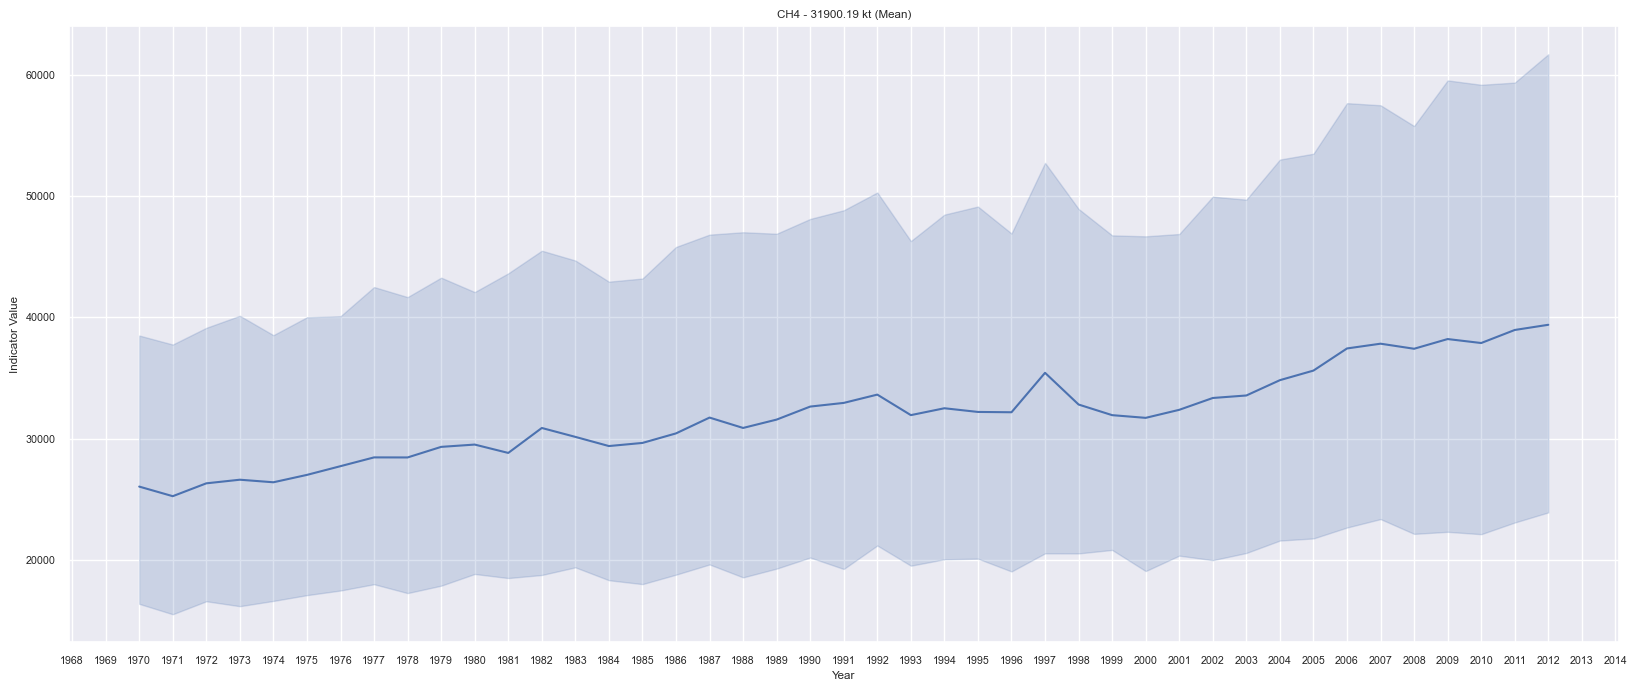

In [30]:
# Create a new figure for plotting with a specific figure size.
plt.figure(figsize=(20, 8))

# Set the font scale for the seaborn library to adjust the size of text labels in the plot.
sns.set(font_scale=0.7)

# Create a subplot within the figure. In this case, there's only one subplot.
plt.subplot(1, 1, 1)

# Plot CH4 (methane) data using a line plot.
# Parameters:
#   - CH4: The DataFrame containing the data to be plotted.
#   - x: The column in the DataFrame to be used as the x-axis data (Year).
#   - y: The column in the DataFrame to be used as the y-axis data (Indicator Value).
sns.lineplot(data=CH4, x="Year", y="Indicator Value")

# Set the title for the plot, including the mean value of the "Indicator Value" from the CH4 data.
plt.title(f'CH4 - {CH4["Indicator Value"].mean():.2f} kt (Mean)')


Text(0.5, 1.0, 'N2O - 13575.87 kt (Mean)')

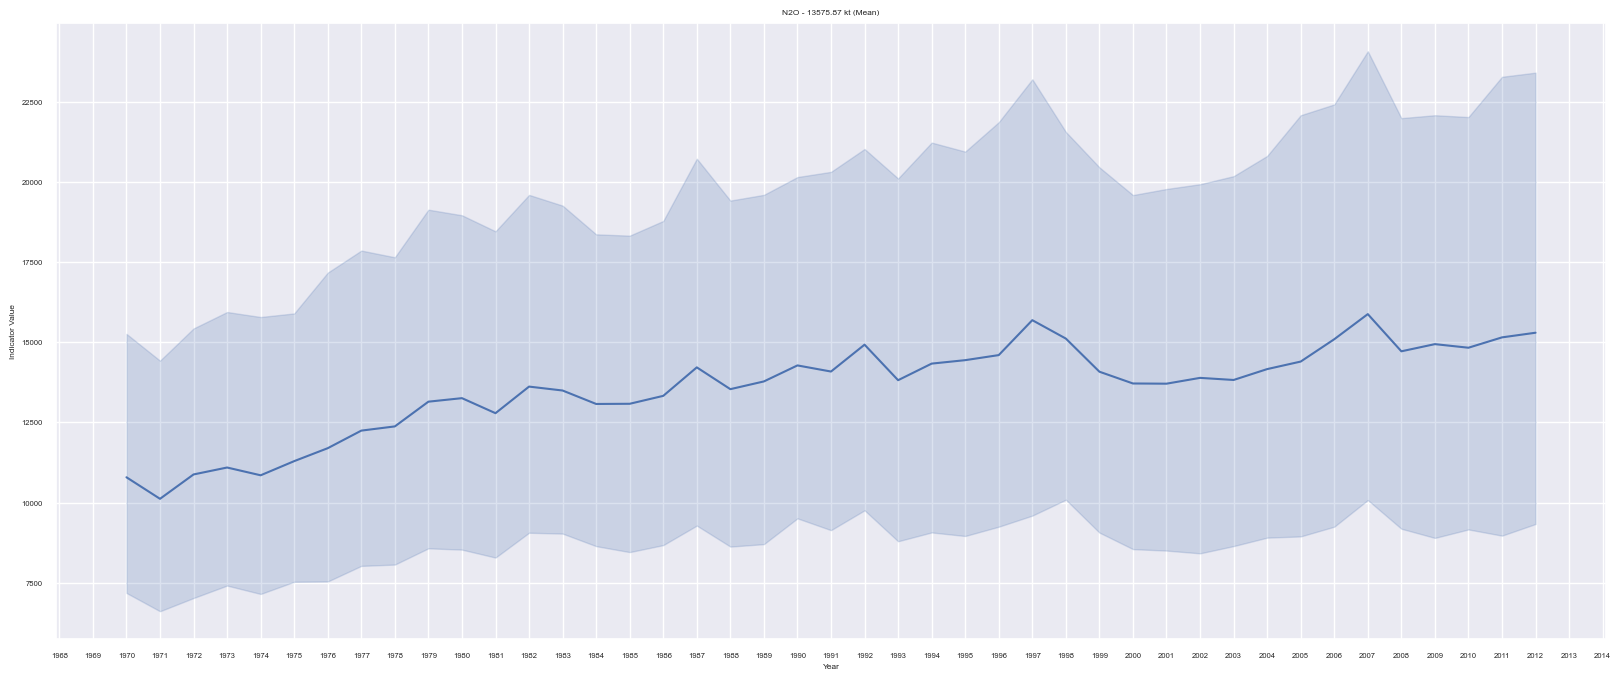

In [31]:
# Create a new figure for plotting with a specific figure size.
plt.figure(figsize=(20, 8))

# Set the font scale for the seaborn library to adjust the size of text labels in the plot.
sns.set(font_scale=0.5)

# Create a subplot within the figure. In this case, there's only one subplot.
plt.subplot(1, 1, 1)

# Plot N2O (nitrous oxide) data using a line plot.
# Parameters:
#   - N2O: The DataFrame containing the data to be plotted.
#   - x: The column in the DataFrame to be used as the x-axis data (Year).
#   - y: The column in the DataFrame to be used as the y-axis data (Indicator Value).
sns.lineplot(data=N2O, x="Year", y="Indicator Value")

# Set the title for the plot, including the mean value of the "Indicator Value" from the N2O data.
plt.title(f'N2O - {N2O["Indicator Value"].mean():.2f} kt (Mean)')


Text(0.5, 1.0, 'Others - 30824.99 kt (Mean)')

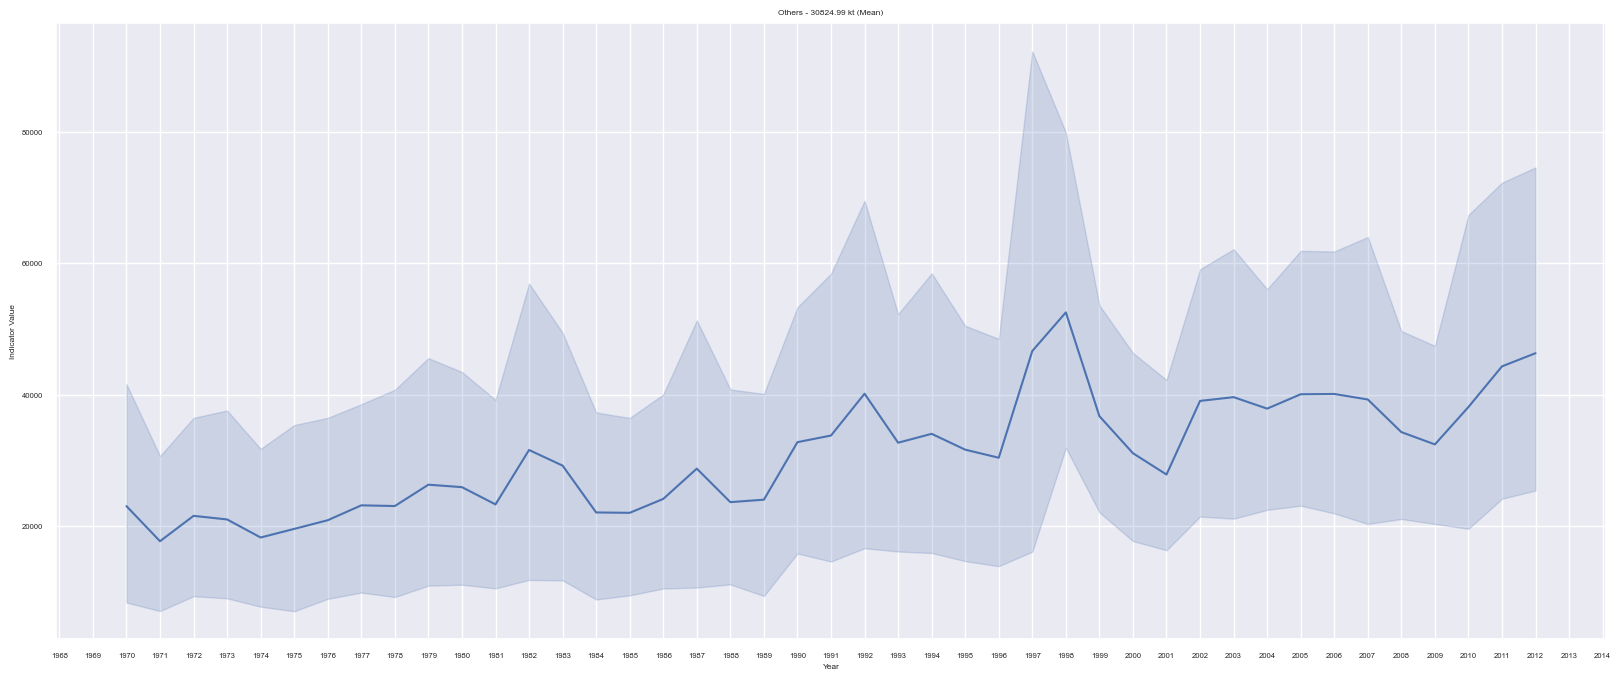

In [32]:
# Create a new figure for plotting with a specific figure size.
plt.figure(figsize=(20, 8))

# Set the font scale for the seaborn library to adjust the size of text labels in the plot.
sns.set(font_scale=0.5)

# Create a subplot within the figure. In this case, there's only one subplot.
plt.subplot(1, 1, 1)

# Plot data labeled as "Others" using a line plot.
# Parameters:
#   - Others: The DataFrame containing the data to be plotted.
#   - x: The column in the DataFrame to be used as the x-axis data (Year).
#   - y: The column in the DataFrame to be used as the y-axis data (Indicator Value).
sns.lineplot(data=Others, x="Year", y="Indicator Value")

# Set the title for the plot, including the mean value of the "Indicator Value" from the "Others" data.
plt.title(f'Others - {Others["Indicator Value"].mean():.2f} kt (Mean)')


-------

<h4>7.2 (3 marks)</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**

It is obvious that there has been a persistent trend of steadily increasing emissions of CO2, NO2, CH4, and Other pollutants from 1960-2014 (given there exist no data after 2014 or before 1960). An interesting observation from both the lower and upper extremes of these emissions distributions is their level of change over the years.
At the lower end of the emission spectrum, where levels are minimal, the rise in emissions is characterized by a relatively gradual incline, signifying a slower rate of change. In contrast, at the upper echelon of emissions, where levels are already high, there are discernible and substantial year-to-year spikes, indicating abrupt and pronounced increases in emission levels.

Another observation that applies only to "Others", similar the other pollutions "Others" steadily increase as previously mentioned but it displays is extremely volatile within these within it upper echelons of emissions, this may be more the case of the data provide and it's variability of pollutant, but given we don't know it's quite difficult to say and decouple on why it has this volatility.

-------

<h4>7.3 (7 marks)</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

**Answer.**

In [33]:
filtered_R_df = filtered_Emissions_R_df[filtered_Emissions_R_df['Indicator Name'].isin(main_pollutants)]
grouped_R_df = filtered_df.groupby('Indicator Name')['Indicator Value'].describe()
grouped_R_df

,count,mean,std,min,25%,50%,75%,max
Indicator Name,,,,,,,,
CH4,8736.0,31900.185639,104985.622926,0.000,880.621250,5457.5050,19325.339000,1.752290e+06
CO2,9856.0,100481.131586,495094.173851,-80.674,557.384000,4275.7220,40085.810500,1.029193e+07
N2O,8779.0,13575.872976,41248.850927,0.000,291.106585,2499.2944,8913.466837,5.871664e+05
Other,7971.0,30824.989016,132149.566564,-326272.600,7.548464,843.2500,10754.864020,3.484920e+06


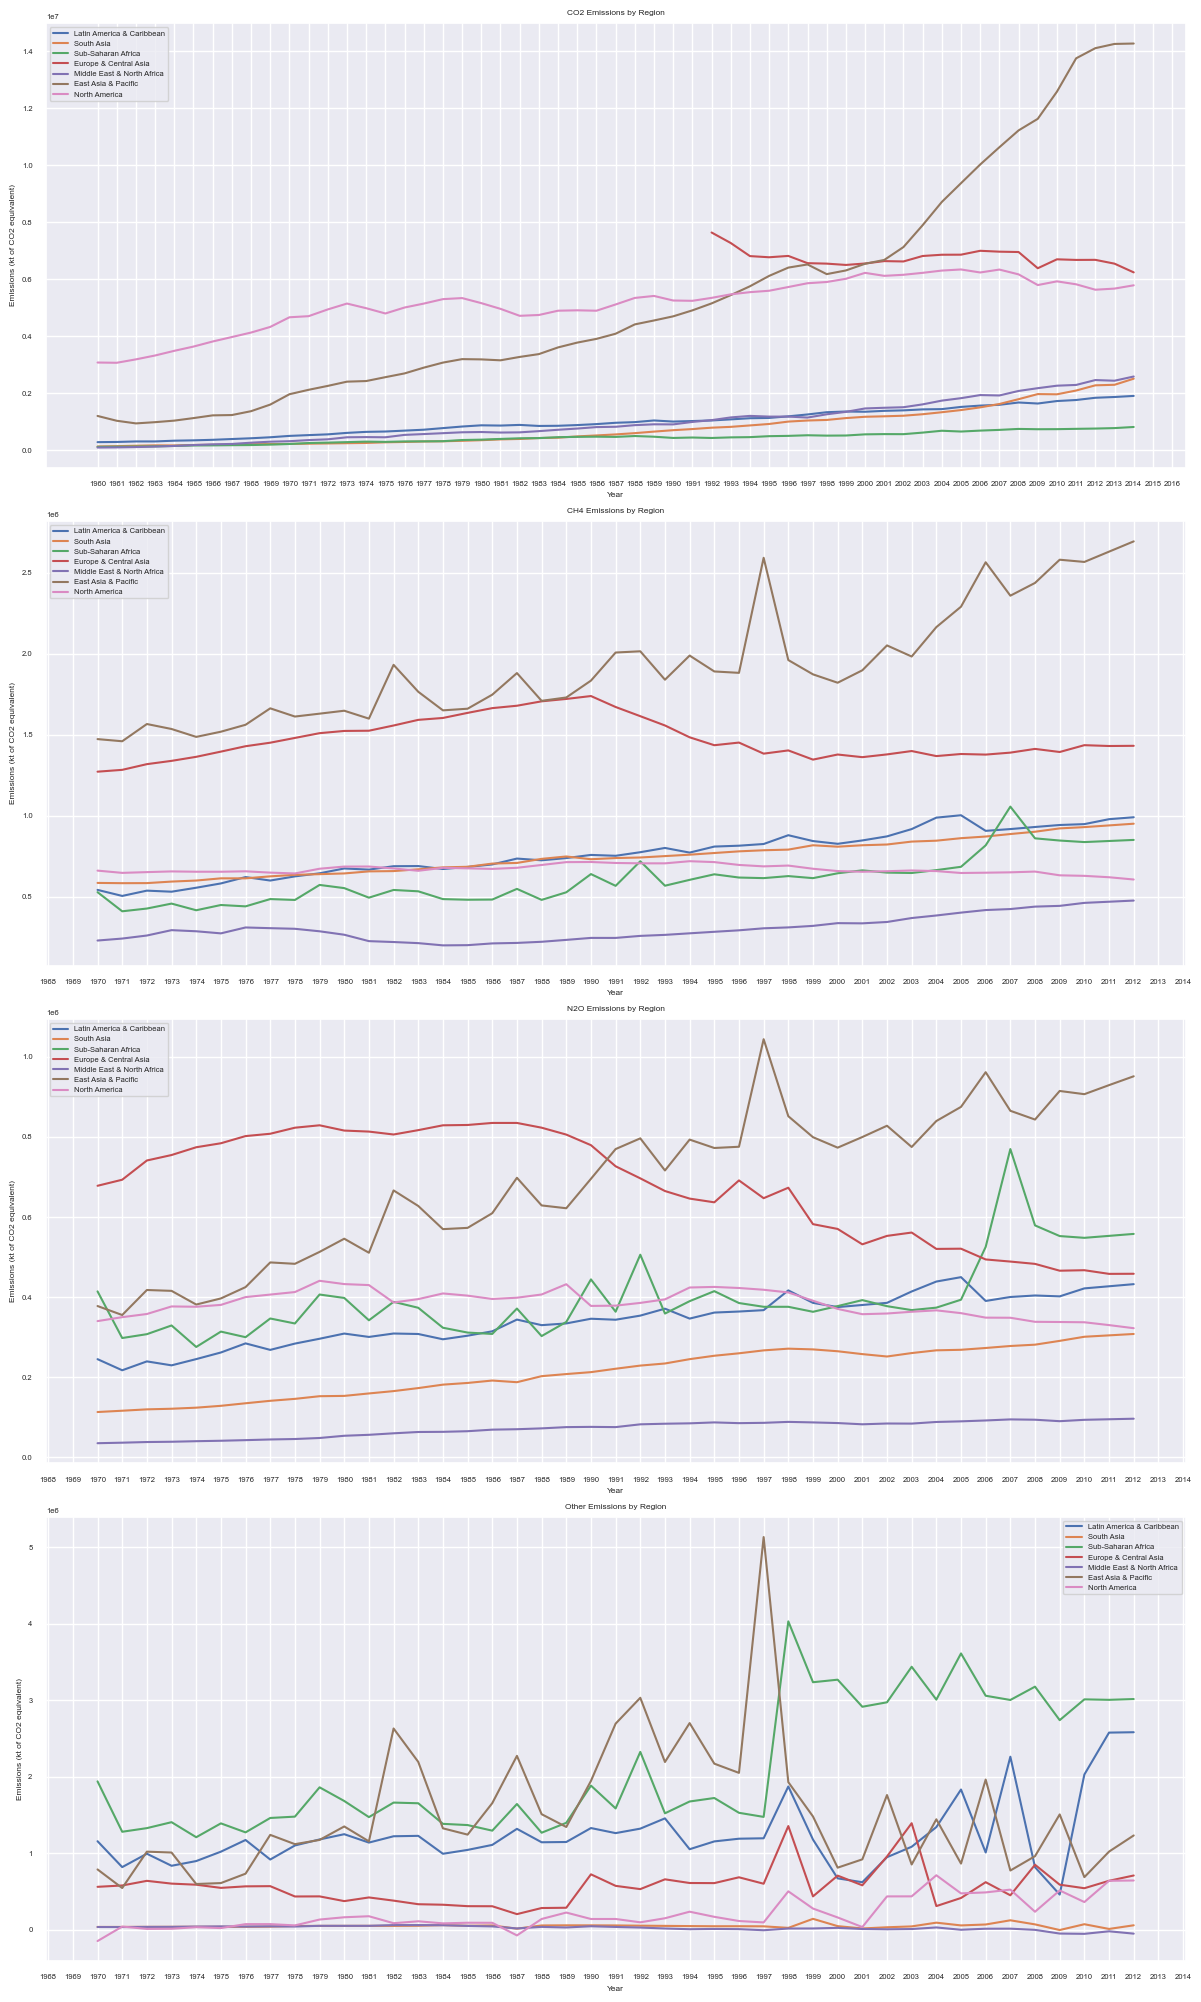

In [34]:
main_regions = [
    'Latin America & Caribbean',
    'South Asia',
    'Sub-Saharan Africa',
    'Europe & Central Asia',
    'Middle East & North Africa',
    'East Asia & Pacific',
    'North America'
]

# Define the main air pollutants
main_pollutants = ['CO2', 'CH4', 'N2O', 'Other']

# Create subplots for each pollutant
fig, axes = plt.subplots(nrows=len(main_pollutants), ncols=1, figsize=(12, 20))

# Iterate through pollutants and create a bar plot for each
for i, pollutant in enumerate(main_pollutants):
    ax = axes[i]
    ax.set_title(f'{pollutant} Emissions by Region')

    # Filter the data for the current pollutant
    pollutant_data = filtered_R_df[filtered_R_df['Indicator Name'] == pollutant]

    # Create the bar plot
    for region in main_regions:
        region_data = pollutant_data[pollutant_data['Country Name'] == region]
        ax.plot(region_data['Year'], region_data['Indicator Value'], label=region)

    ax.set_xlabel('Year')
    ax.set_ylabel('Emissions (kt of CO2 equivalent)')
    ax.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


### Conclusion
It appears that nations in the East Asia and Pacific region have been facing significant challenges in managing pollutant emissions as we can see an upward trend that has consisted through the years, while Europe and Central Asia have shown commendable efforts in reducing their environmental footprint. The line plot also Strikingly shows that North America and Sub-Saharan Africa have experienced a concerning trend of increasing emissions over the years, diverging from the global efforts towards sustainability.

-------

<h3>Exercise 8  (10 marks):</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1 (5 marks)</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**

In [35]:
total_emission = filtered_df[(filtered_df["Indicator Name"] == 'CO2') & (filtered_df["Year"].isin(filtered_df["Year"].unique()[-16:-6]))].groupby("Country Name")["Indicator Value"].sum().reset_index()
total_emission = total_emission.sort_values(by="Indicator Value", ascending=False)

print(f"Top 5 countries that been top 10 of C02 emitter over the years: {total_emission.head(5)}\n")



total_emission = filtered_df[(filtered_df["Indicator Name"] == 'CO2') & (filtered_df["Year"].isin(filtered_df["Year"].unique()[-16:-6]))]\
                 .groupby("Country Name")["Indicator Value"]\
                 .sum()\
                 .reset_index()

total_emission = total_emission.sort_values(by="Indicator Value", ascending=False)
print(f"Top 10 from the past 10 year(s):\n {total_emission.head(5)}")

Top 5 countries that been top 10 of C02 emitter over the years:            Country Name  Indicator Value
41                China     7.904082e+07
206       United States     5.487355e+07
161  Russian Federation     1.688571e+07
89                India     1.600996e+07
98                Japan     1.214238e+07

Top 10 from the past 10 year(s):
            Country Name  Indicator Value
41                China     7.904082e+07
206       United States     5.487355e+07
161  Russian Federation     1.688571e+07
89                India     1.600996e+07
98                Japan     1.214238e+07


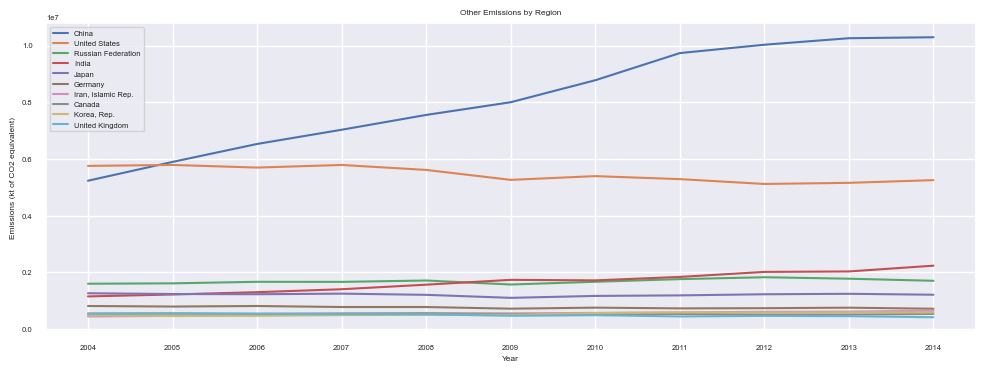

In [36]:
top_ten = total_emission.head(10)["Country Name"].tolist()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
CO2_df = filtered_df[filtered_df["Indicator Name"] == 'CO2']
axes.set_title(f'{pollutant} Emissions by Region')
for i, country in enumerate(top_ten):
    country_df = CO2_df[\
                        (CO2_df['Country Name'] == country) & \
                        (CO2_df["Year"].isin(CO2_df["Year"].unique()[-16:-5]))\
                        ]
    axes.plot(country_df['Year'], country_df['Indicator Value'], label=country)

axes.set_xlabel('Year')
axes.set_ylabel('Emissions (kt of CO2 equivalent)')
axes.legend()


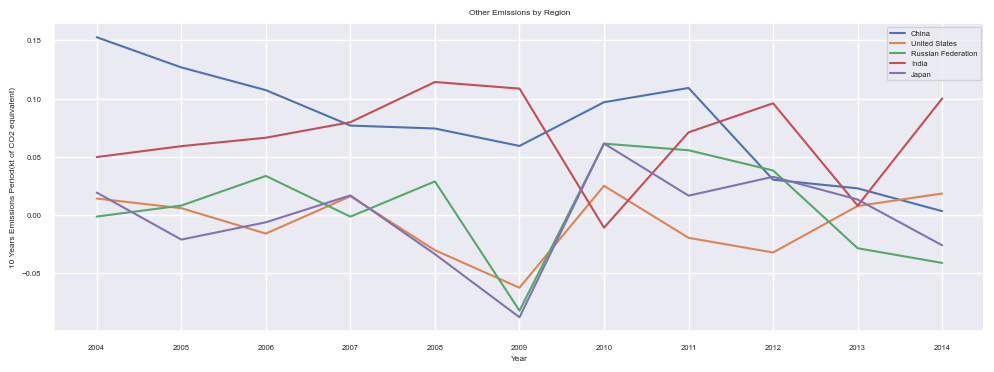

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
CO2_df = filtered_df[filtered_df["Indicator Name"] == 'CO2']
axes.set_title(f'{pollutant} Emissions by Region')
for i, country in enumerate(top_ten[:5]):
    rate_of_change = CO2_df[\
                        (CO2_df['Country Name'] == country) & \
                        (CO2_df["Year"].isin(CO2_df["Year"].unique()[-17:-5]))\
                        ]
    axes.plot(rate_of_change['Year'], rate_of_change["Indicator Value"].pct_change(), label=country)

axes.set_xlabel('Year')
axes.set_ylabel('10 Years Emissions Period(kt of CO2 equivalent)')
axes.legend()

Over the past decade, notable efforts have been made by these countries to mitigate emissions. During this period, China, United States both the largest producer has consistently demonstrated a remarkable reduction in its carbon emissions we can see this as there curve begins to plateau . Other major emitters such as the Russia, and Japan have faced challenges in emissions reduction and, although there has been a discernible decrease in their emission levels in some years but there has been no drastic changes. Finally India, a significant emitter historically, has increased it's level of emission with over the past 10 years, noted not drastically but in with respect to the countries within the same range India has surpassed them in emission in CO2 which show no change in there policy for reduction in emission.

-------

<h4>8.2  (5 marks)</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

In [38]:
total_emission = filtered_Emissions_C_df["Indicator Value"].sum()

country_total_emission = filtered_Emissions_C_df[(filtered_Emissions_C_df["Year"].isin(filtered_Emissions_C_df["Year"].unique()))].groupby("Country Name")["Indicator Value"].sum().reset_index()
country_sorted_total_emission = country_total_emission.sort_values(by="Indicator Value", ascending=False)


print("Total Emission :", total_emission)
print(f"% of top 5 total emitters {(country_sorted_total_emission[:5].sum()['Indicator Value'].item()/total_emission) * 100:.2f}%")
print(f"% of rest of total emitters {(country_sorted_total_emission[5:].sum()['Indicator Value'].item()/total_emission) * 100:.2f}%")

Total Emission : 3231717428.4926896
% of top 5 total emitters 46.67%
% of rest of total emitters 53.33%


Yes these five countries carrying out the burden of 46.67% of the total emissions emitted over the years globally, in terms of what we can say about the rest of the world making some effort to control their pollution emissions over the years we need see there trend

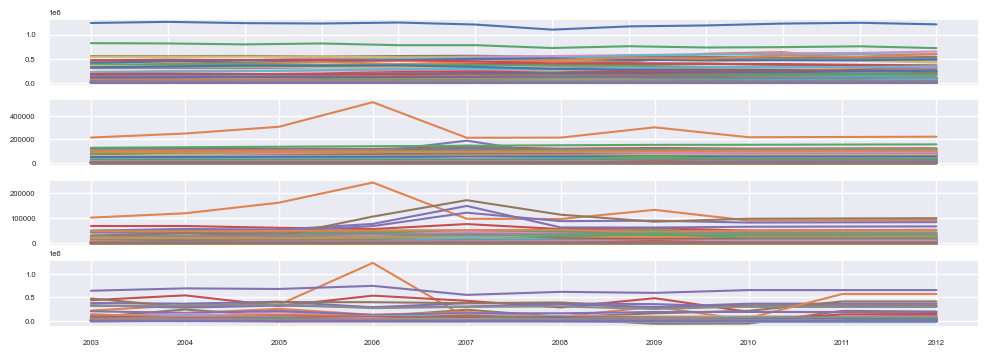

In [39]:
temp = filtered_df[(filtered_df["Year"].isin(filtered_df["Year"].unique()[-16:-6]))].groupby("Country Name")["Indicator Value"].sum().reset_index()
temp.sort_values(by="Indicator Value", ascending=False, inplace=True)
fig, axes = plt.subplots(nrows=len(main_pollutants), ncols=1, figsize=(12, 4))

# axes.set_title(f'{pollutant} Emissions by Region')
for i, pollutant in enumerate(main_pollutants):
    ax = axes[i]
    # ax.set_title(f'{pollutant} Emissions by Region')
    CO2_df = filtered_df[filtered_df["Indicator Name"] == pollutant]
    for country in temp[5:]["Country Name"]:
        rate_of_change = CO2_df[\
                            (CO2_df['Country Name'] == country) & \
                            (CO2_df["Year"].isin(CO2_df["Year"].unique()[-17:-5]))\
                            ]
        ax.plot(rate_of_change['Year'], rate_of_change["Indicator Value"], label=country)
        # total_rate_of_change = rate_of_change['Indicator Value'].pct_change().sum()


The plot is challenging to interpret as it shows relatively consistent emissions across major pollutants, with minimal variation between different countries. In this visual analysis, we observe no significant increases in emissions, in contrast to the top 5 countries. The rest of the world maintains a relatively stable level of emissions for CO2, CH4, NO2, and other pollutants.

-------

<h2>The health impacts of air pollution</h2>

<h3>Exercise 9  (10 marks):</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1  (7 marks)</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

In this question, some helpful plots may include Scatter plot over time, Line plot by income groups, box-plot, and a heatmap.

In [40]:
merged_df = filtered_Emissions_C_df.merge(WDICountry, left_on='Country Code', right_on='Country Code', how='left')

# Filter rows where the 'Indicator Name' is 'PM2.5_WHO'
pm25_df = merged_df[(merged_df["Year"].isin(['1990', '1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2019', '2020'])) & (merged_df['Indicator Name'] == 'PM2.5_WHO')]

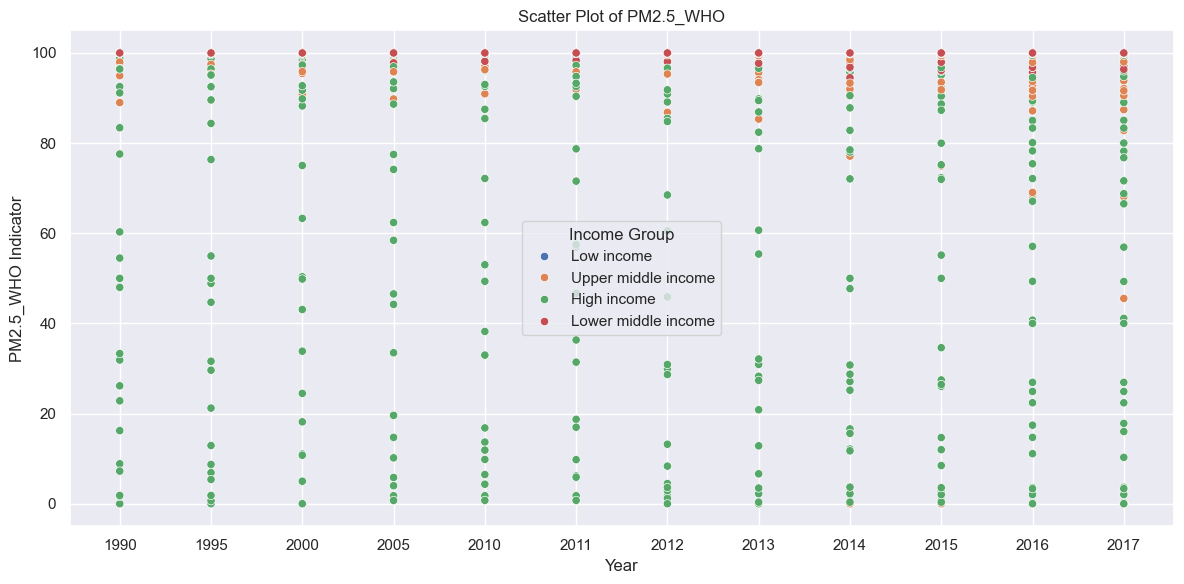

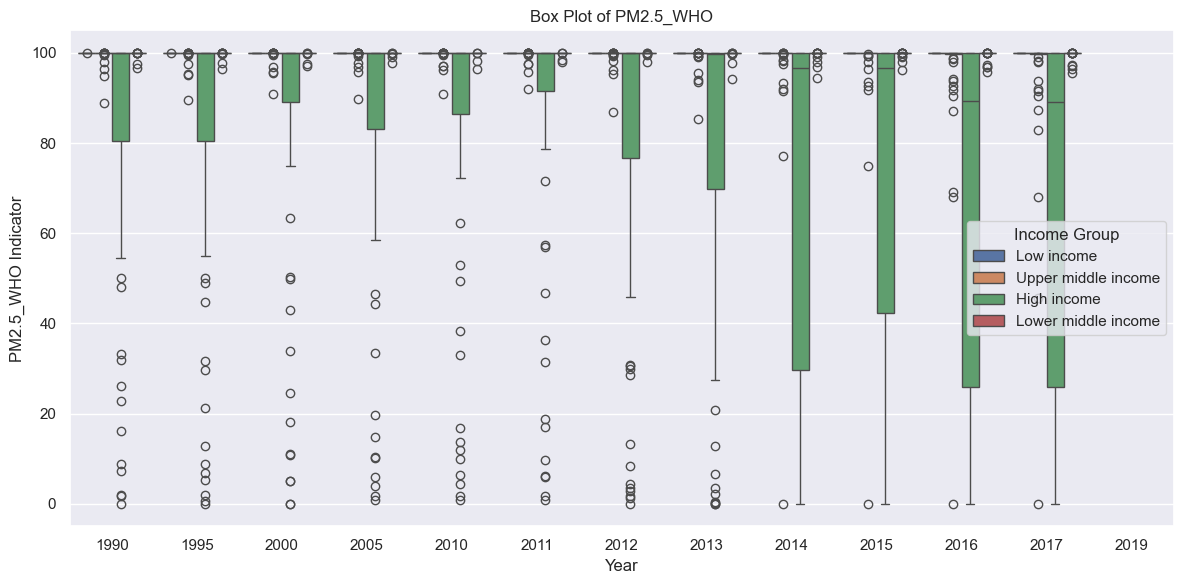

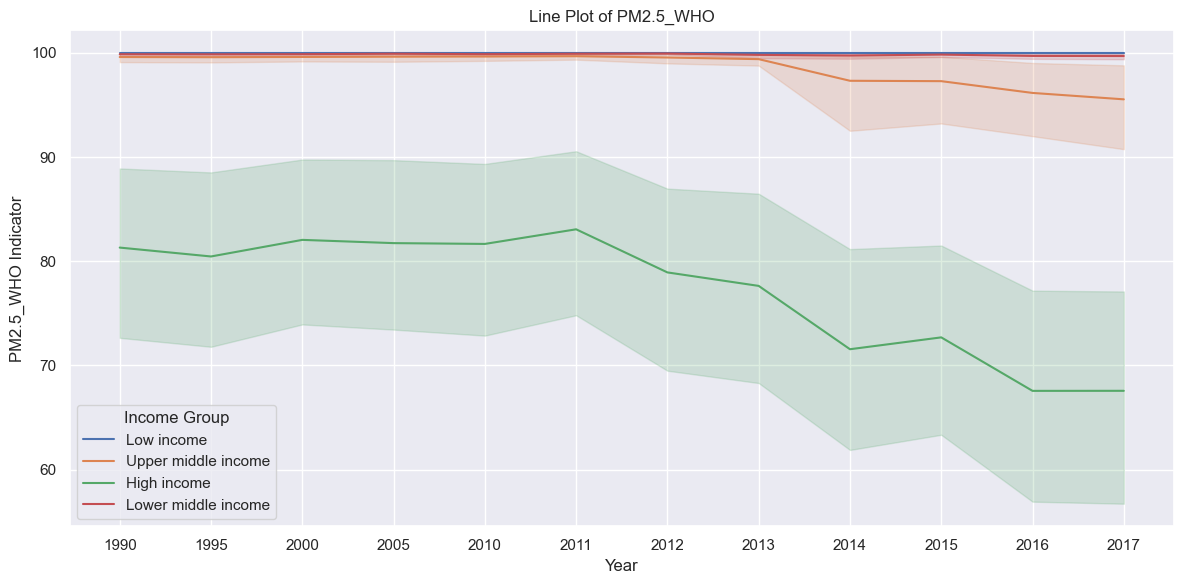

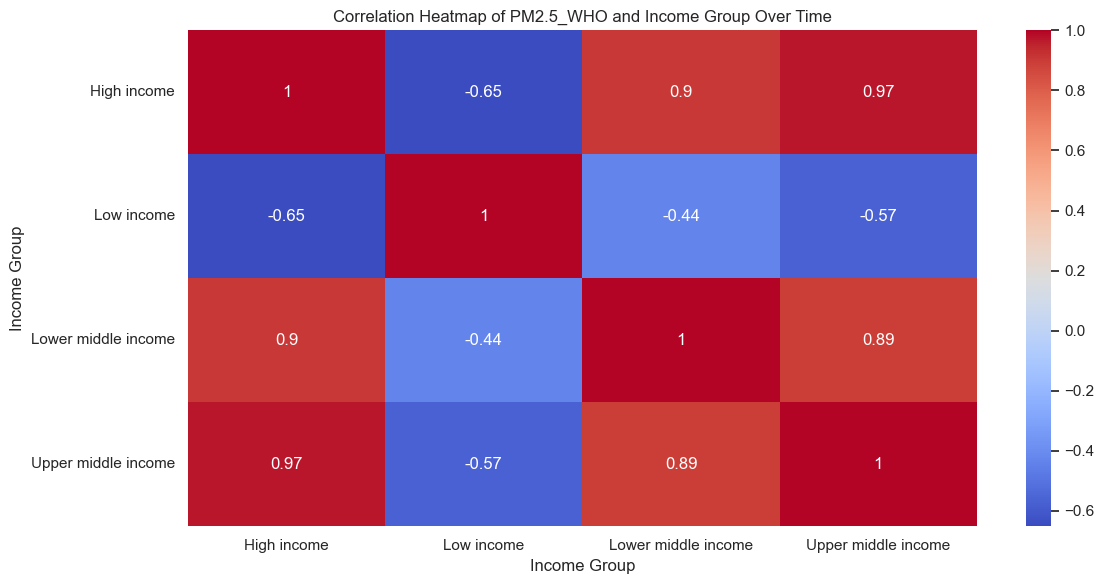

In [41]:

# Create a scatter plot over time
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pm25_df, x='Year', y='Indicator Value', hue='Income Group')
plt.xlabel('Year')
plt.ylabel('PM2.5_WHO Indicator')
plt.title('Scatter Plot of PM2.5_WHO')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

# Create a box plot by income group
plt.figure(figsize=(12, 6))
sns.boxplot(data=pm25_df, x='Year', y='Indicator Value', hue='Income Group')
plt.xlabel('Year')
plt.ylabel('PM2.5_WHO Indicator')
plt.title('Box Plot of PM2.5_WHO')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

# Create a line plot by income group
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_df, x='Year', y='Indicator Value', hue='Income Group')
plt.xlabel('Year')
plt.ylabel('PM2.5_WHO Indicator')
plt.title('Line Plot of PM2.5_WHO')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()

# Calculate the correlation and create a heatmap
correlation_matrix = pm25_df.pivot_table(index='Year', columns='Income Group', values='Indicator Value')
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of PM2.5_WHO and Income Group Over Time')
plt.tight_layout()
plt.show()


Scatter plot: a consistent negative correlation suggests that higher-income countries tend to have better air quality with lower PM2.5_WHO values over time. This indicates a possible potential link between the income of a country and air quality.

Box plot: Highlighting disparities in PM2.5_WHO levels. Precise separation between income groups indicates that higher-income groups consistently have lower exposure to PM2.5, highlighting the income-based differences in air pollution exposure within the given countries.

Line plot: Trends in PM2.5_WHO values over time within each income group. A decreasing trend indicates air quality improvements, while an increasing trend suggests deteriorating air quality, providing insights into temporal changes.

Correlation heatmap: relationship between income and PM2.5_WHO. A negative correlation over time indicates that higher income is associated with lower pollution exposure, helping to assess the strength and direction of this relationship.


-------

<h4>9.2  (3 marks)</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

**Answer.**

Countries with economic stability and resources find it more achievable to reduce their emissions to improve life. This is primarily because they possess the financial capability to facilitate the necessary transitions within their economies, thereby contributing to the creation of a more environmentally sustainable and improved quality of life for their residents. 

-------

<h3>Exercise 10  (30 marks):</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1  (4 marks)</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**

The under-5 mortality rate, measured per 1,000 live births, reflects the likelihood of a newborn passing away before reaching five years of age when exposed to the mortality rates of a specific year. By examining this data, we can assess whether countries with poorer air quality, potentially leading to higher exposure to particulate matter, experience an increase in infant mortality. On the other hand, the total life expectancy at birth, measured in years, indicates how long a newborn would be expected to live under current mortality conditions. This metric helps us evaluate whether countries with worse air quality may see a reduction in life expectancy.

-------

<h4>10.2  (4 marks)</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

**Answer.**

In [42]:
Mortality_ar = WDI_ids[WDI_ids['Subtopic'].isin(["Mortality"])]["Series Code"].unique()
Mortality_df = WDI_data[WDI_data['Indicator Code'].isin(Mortality_ar)]

print("Total number of unique Mortality indicators: %s" % (len(Mortality_df["Indicator Code"].unique())))
print("Total number of Mortality indicators: %s" % (len(Mortality_df["Indicator Code"])))

Mortality_df = Mortality_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                 var_name='Year', 
                                 value_name="Indicator Value")

There a total number of unique Mortality indicators 33
There a total number of Mortality indicators 8712


In [43]:
new_indicator_names_1 = ["House&Ambient-Air", 'Under-5', 'Life-Expectancy']
indicator_long_names = [
    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Life expectancy at birth, total (years)'
]
indicator_map_1 = pd.DataFrame({"long": indicator_long_names, "short": new_indicator_names_1})


In [89]:
Mortality_df['Indicator Name'] = Mortality_df['Indicator Name'].map(indicator_map_1.set_index('long')['short'])
new_indicator_names_1[1:2]

['Under-5']

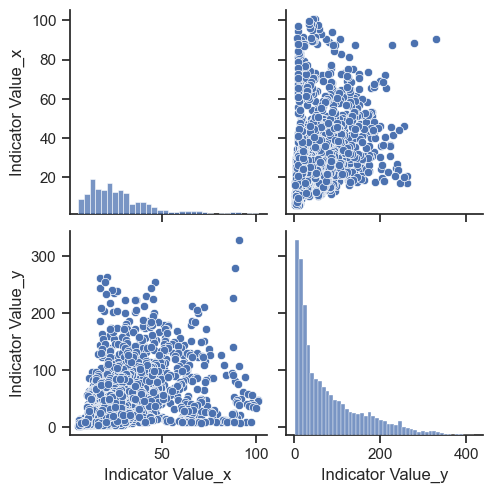

In [92]:
filtered_emission_C_under_5_df = filtered_Emissions_C_df[
    (filtered_Emissions_C_df["Indicator Name"] == "PM2.5") &
    (filtered_Emissions_C_df["Country Code"].isin(Mortality_df[Mortality_df['Indicator Name'].isin(new_indicator_names_1[1:2])]["Country Code"].unique()))
]

data = pd.merge(filtered_emission_C_under_5_df, Mortality_df[Mortality_df['Indicator Name'].isin(new_indicator_names_1[1:2])], on=["Country Name", "Year"])[["Country Name", "Indicator Value_x", "Indicator Value_y"]]

sns.pairplot(data=data, markers=["o", "s"])

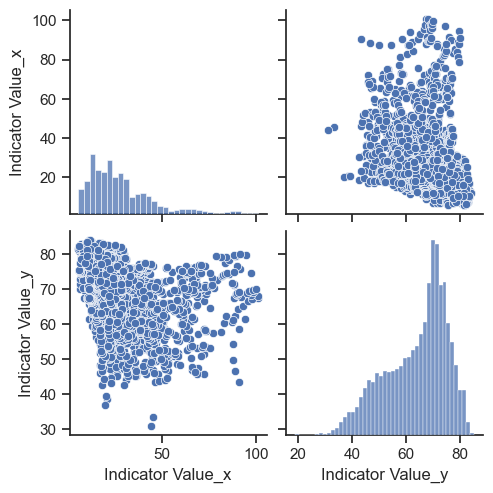

In [93]:
lf_expectancy_under_5_df = Mortality_df[Mortality_df['Indicator Name'].isin(new_indicator_names_1[2:])]
filtered_emission_C_under_5_df = filtered_Emissions_C_df[
    (filtered_Emissions_C_df["Indicator Name"] == "PM2.5") &
    (filtered_Emissions_C_df["Country Code"].isin(lf_expectancy_under_5_df["Country Code"].unique()))
]

data = pd.merge(filtered_emission_C_under_5_df, lf_expectancy_under_5_df, on=["Country Name", "Year"])[["Country Name", "Indicator Value_x", "Indicator Value_y"]]

sns.pairplot(data=data, markers=["o", "s"])

<h4>10.3  (4 marks)</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

**Answer.**

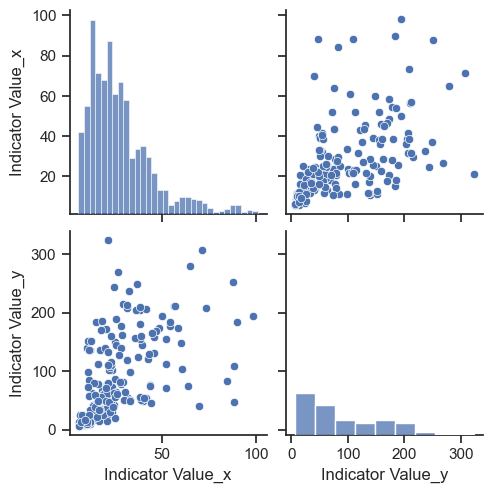

In [78]:
ambient_df = Mortality_df[Mortality_df['Indicator Name'].isin(new_indicator_names_1[:1])]
filtered_emission_C_ambient_df = filtered_Emissions_C_df[(filtered_Emissions_C_df["Indicator Name"] == "PM2.5")& (filtered_Emissions_C_df["Country Code"].isin(ambient_df["Country Code"].unique()))]

data = pd.merge(filtered_emission_C_ambient_df, ambient_df, on=["Country Name", "Year"])[["Country Name", "Indicator Value_x", "Indicator Value_y"]]

sns.pairplot(data=data, markers=["o", "s"])

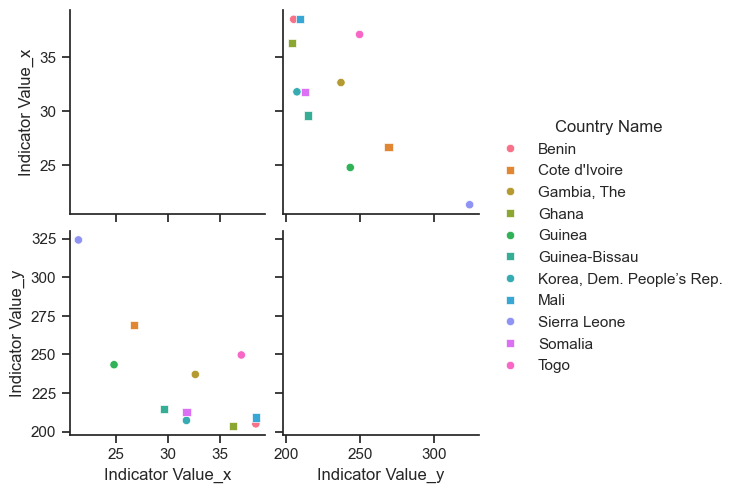

In [73]:
filtered_data = data[(data["Indicator Value_y"] > 200) & (data["Indicator Value_x"] < 40)]
sns.set_palette(sns.color_palette("Set1"))  
plot = sns.pairplot(data=filtered_data, hue="Country Name", markers=["o", "s"])

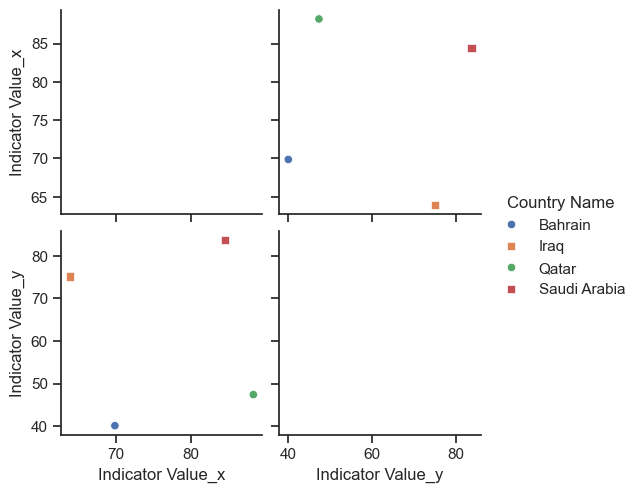

In [80]:
filtered_data = data[(data["Indicator Value_y"] < 100) & (data["Indicator Value_x"] > 60)]
sns.set_palette(sns.color_palette("Set1")) 
plot = sns.pairplot(data=filtered_data, hue="Country Name", markers=["o", "s"])


**Answer.**

Income Category: Low income
Summary:
count     165.000000
mean     1666.288485
std       713.438043
min        75.200000
25%      1992.000000
50%      2010.000000
75%      2013.000000
max      2018.000000
Name: Indicator Value, dtype: float64


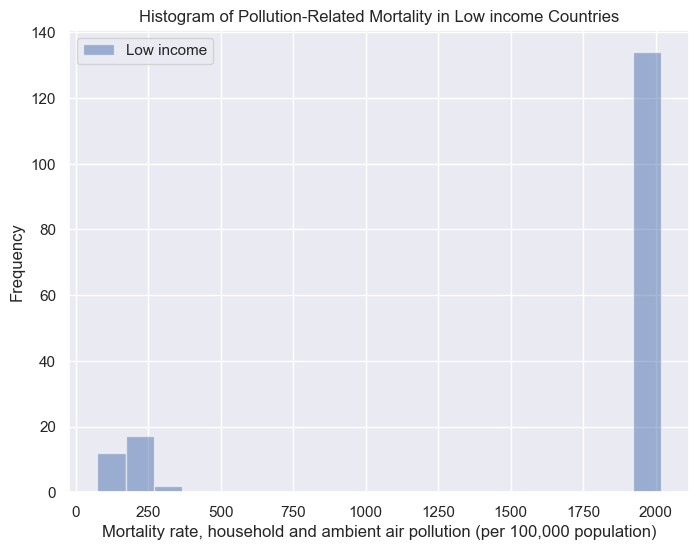

Income Category: Upper middle income
Summary:
count     356.000000
mean     1715.335955
std       699.413076
min        23.300000
25%      2006.000000
50%      2011.000000
75%      2014.000000
max      2018.000000
Name: Indicator Value, dtype: float64


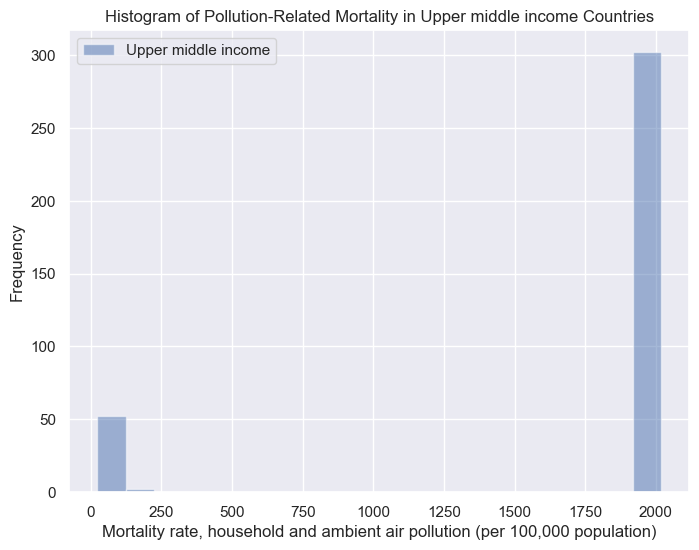

Income Category: Lower middle income
Summary:
count     275.000000
mean     1696.961091
std       701.070603
min        41.900000
25%      2001.000000
50%      2011.000000
75%      2014.000000
max      2017.000000
Name: Indicator Value, dtype: float64


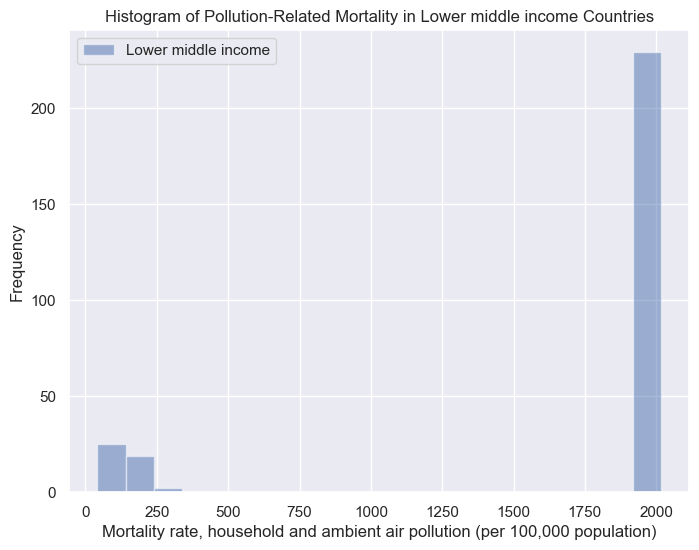

Income Category: High income
Summary:
count     375.000000
mean     1736.243733
std       687.528611
min         7.000000
25%      2010.000000
50%      2011.000000
75%      2014.000000
max      2018.000000
Name: Indicator Value, dtype: float64


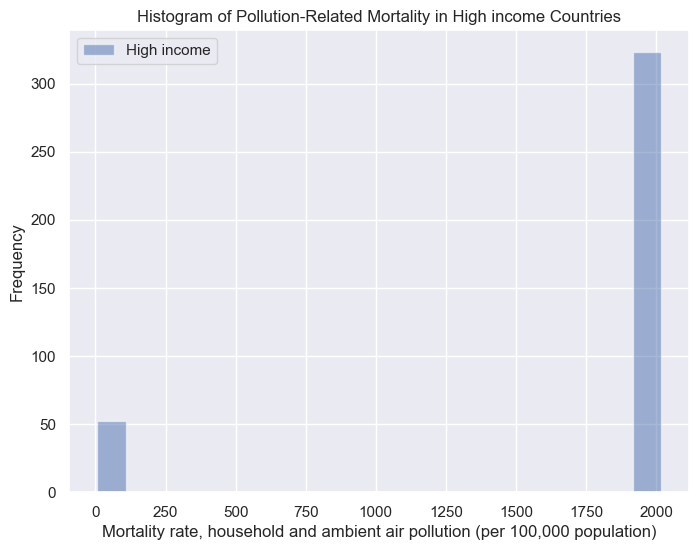

In [400]:
ar = WDI_ids[WDI_ids['Subtopic'] == "Mortality"]["Series Code"].unique()
last_df = WDI_data[WDI_data['Indicator Code'].isin(ar)]

last_df2 = pd.merge(last_df, WDICountry, on=["Country Code"], how="inner")

melted_lastdf = last_df2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group'], var_name='Year', value_name="Indicator Value")

melted_lastdf = melted_lastdf.dropna(subset=['Indicator Value', 'Income Group'])
melted_lastdf.drop(melted_lastdf[melted_lastdf["Year"] == "Unnamed: 64"].index, inplace=True)

melted_lastdf = melted_lastdf.reset_index(drop=True)
melted_lastdf['Indicator Value'] = pd.to_numeric(melted_lastdf['Indicator Value'], errors='coerce')

income_categories = melted_lastdf['Income Group'].unique()

for category in income_categories:
    category_data = melted_lastdf[melted_lastdf['Income Group'] == category]
    pollution_mortality = category_data[category_data['Indicator Name'] == 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)']['Indicator Value']

    print(f"Income Category: {category}")
    print(f"Summary:\n{pollution_mortality.describe()}")

    plt.figure(figsize=(8, 6))
    plt.hist(pollution_mortality, bins=20, alpha=0.5, label=category)
    plt.xlabel("Mortality rate, household and ambient air pollution (per 100,000 population)")
    plt.ylabel("Frequency")
    plt.title(f'Histogram of Pollution-Related Mortality in {category} Countries')
    plt.legend()
    plt.show()

-------

<h4>10.5  (8 marks)</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

1. The data shows that some major polluting countries, like China, the United States, Russia, and Japan, are slowing down or even reducing their pollutant emissions. This shows their commitment to environmental sustainability.

2. Regions like Asia and the Pacific, and North America contribute significantly to global emissions. To tackle pollution effectively, it's crucial to focus on environmental campaigns in these areas.

3. The data suggests that we're making progress in understanding air pollution's impact on death rates. Many countries have values that could be risky for public health.

4. To identify demographic characteristics correlated with health-related issues from air pollution, we need specific data on demographic factors like age, gender, location, and health conditions. Analyzing such data could reveal these correlations.

-------